# Tagging

In [1]:
import nltk
import re
import operator
from collections import defaultdict
import numpy as np

import matplotlib.pyplot as plt

In [3]:
lovecraft = nltk.corpus.PlaintextCorpusReader("lovecraft", ".*")

In [4]:
lovecraft_words = lovecraft.words()

Note pos-tagging means piece-of-speech tagging, so it needs to be applied to sentences because the same word can have different tags depending on the role it plays in the sentence. e.g.:

- I usually eat **fish** & chips
- I **fish** in the beach on Mondays

Here **fish** has two completely different meanings that can only be determined by the other words of the sentence.

In [62]:
lovecraft_sentences = lovecraft.sents()
lovecraft_tagged_words = []
for tokenized_sentence in lovecraft_sentences:
    sentence_with_tagged_words = nltk.pos_tag(tokenized_sentence)
    lovecraft_tagged_words += sentence_with_tagged_words

# Tag count

In [63]:
nltk.help.upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

In [69]:
tag_count = defaultdict(int)
for word, tag in lovecraft_tagged_words:
    tag_count[tag] += 1

print(tag_count)

defaultdict(<class 'int'>, {'DT': 57523, 'NNP': 18886, 'RB': 29377, ',': 26578, 'VBG': 8674, 'JJ': 45775, 'NN': 80752, 'IN': 68744, 'WP$': 579, 'NNS': 28102, 'VBP': 5134, 'VBN': 15297, 'JJS': 1073, 'VBZ': 3110, 'PRP$': 9441, '.': 19019, 'RP': 2128, 'CC': 25264, 'VBD': 36609, 'JJR': 1501, ':': 11391, 'CD': 3713, 'RBS': 231, 'TO': 10740, 'WDT': 3993, 'VB': 14437, 'PRP': 27066, 'FW': 124, 'WP': 2218, 'PDT': 735, 'MD': 5552, 'WRB': 2828, 'POS': 2373, 'EX': 1356, 'RBR': 921, "''": 2022, 'SYM': 245, '(': 83, ')': 64, 'NNPS': 197, 'UH': 30, 'LS': 1, '$': 2, '#': 1})


<Container object of 44 artists>

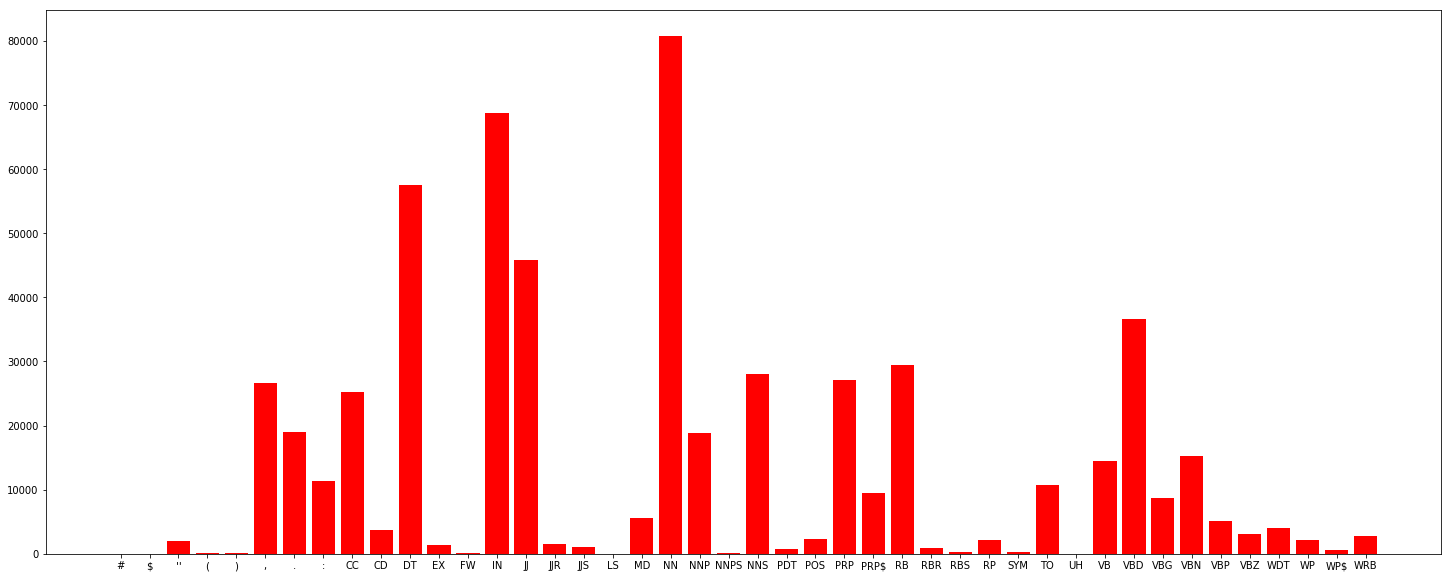

In [70]:
tags = sorted(tag_count.keys())
tag_values = [tag_count[tag] for tag in tags]

plt.figure(figsize=(25,10))
plt.bar(tags, tag_values, color='r')

# Most common words (lemmas)

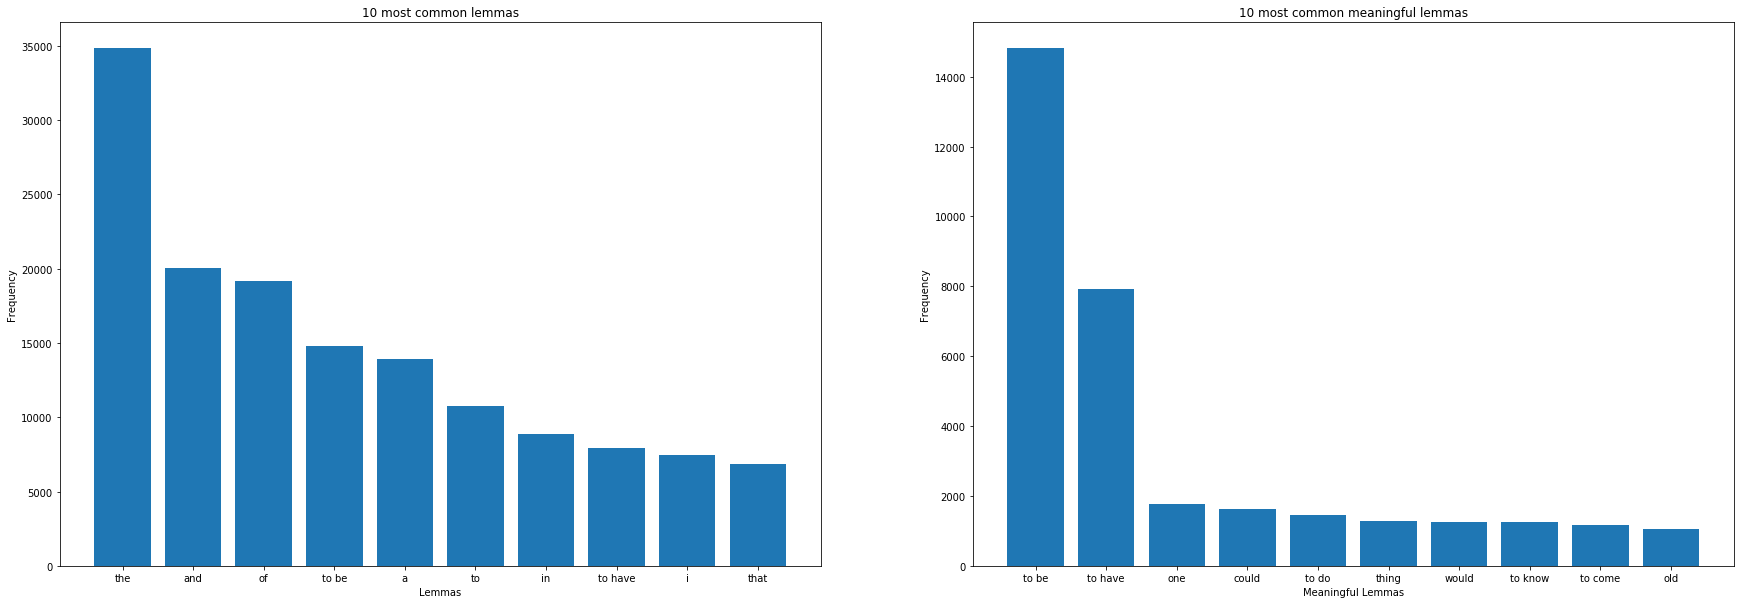

In [71]:
stopwords = set(nltk.corpus.stopwords.words('english'))

lemmatizer = nltk.wordnet.WordNetLemmatizer()

lemma_count = defaultdict(int)
for word, tag in lovecraft_tagged_words:
    if word.isalpha():
        word = word.lower()
        if tag[0] == "V":
            lemma = "to {}".format(lemmatizer.lemmatize(word, "v"))
        else:
            lemma = lemmatizer.lemmatize(word)
        lemma_count[lemma] += 1

number_of_lemmas = 10

lemma_ordered_count = [(lemma, count) for lemma, count in lemma_count.items()]
lemma_ordered_count.sort(key=operator.itemgetter(1), reverse=True)

# Standard words
lemmas = [lemma for lemma, count in lemma_ordered_count[:number_of_lemmas]]
lemma_values = [count for lemma, count in lemma_ordered_count[:number_of_lemmas]]

# Meaningful words
meaningful_lemma_ordered_count = list(filter(lambda w_c: w_c[0] not in stopwords, lemma_ordered_count))
meaningful_lemmas = [lemma for lemma, count in meaningful_lemma_ordered_count[:number_of_lemmas]]
meaningful_lemma_values = [count for lemma, count in meaningful_lemma_ordered_count[:number_of_lemmas]]

fig, ax = plt.subplots(1,2, figsize=(30,10))
ax[0].bar(np.arange(number_of_lemmas), lemma_values)
ax[0].set_title("{} most common lemmas".format(number_of_lemmas))
ax[0].set_xticks(np.arange(number_of_lemmas))
ax[0].set_xticklabels(lemmas)
ax[0].set_xlabel("Lemmas")
ax[0].set_ylabel("Frequency")

ax[1].bar(np.arange(number_of_lemmas), meaningful_lemma_values)
ax[1].set_title("{} most common meaningful lemmas".format(number_of_lemmas))
ax[1].set_xticks(np.arange(number_of_lemmas))
ax[1].set_xticklabels(meaningful_lemmas)
ax[1].set_xlabel("Meaningful Lemmas")
ax[1].set_ylabel("Frequency")


plt.show()

# Most common verbs

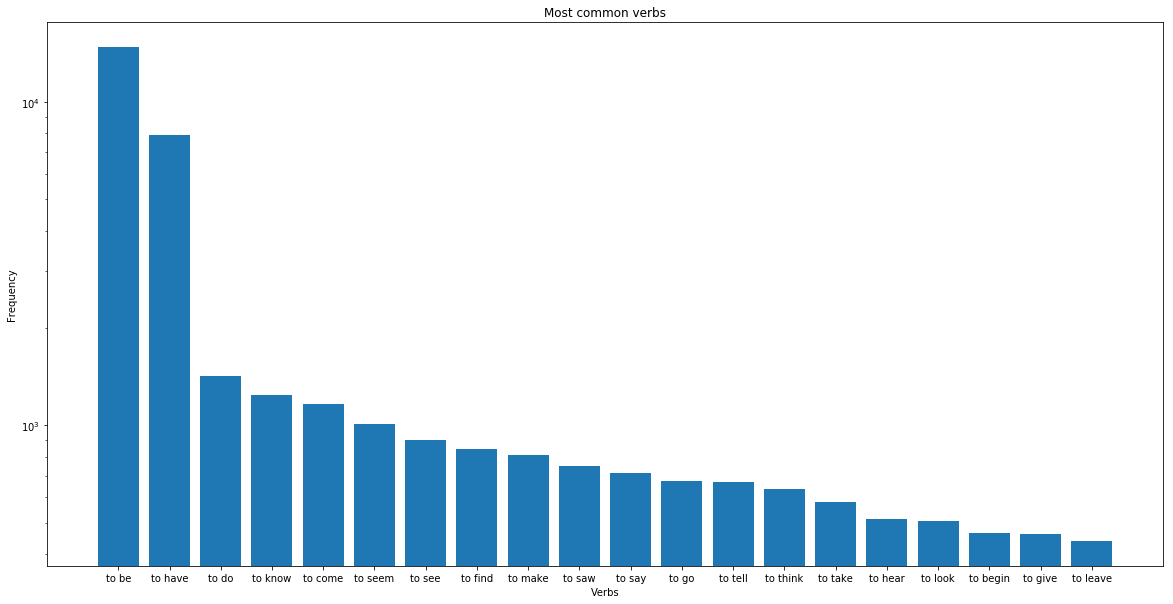

In [72]:
import operator

lemmatizer = nltk.wordnet.WordNetLemmatizer()

verb_count = {}
for word, tag in lovecraft_tagged_words:
    if tag[0] == "V":
        verb = lemmatizer.lemmatize(word, "v")
        verb_count[verb] = verb_count.get(verb, 0) + 1

verb_ordered_count = [(verb, count) for verb, count in verb_count.items()]
verb_ordered_count.sort(key=operator.itemgetter(1), reverse=True)

number_of_verbs = 20

verb_ordered_count = verb_ordered_count[:number_of_verbs]

verbs = ["to {}".format(verb) for verb, count in verb_ordered_count]
verb_values = [count for verb, count in verb_ordered_count]

fig, ax = plt.subplots(1,1, figsize=(20,10))
ax.bar(np.arange(number_of_verbs), verb_values)
ax.set_xticks(np.arange(number_of_verbs))
ax.set_xticklabels(verbs)
ax.set_title("Most common verbs")
ax.set_xlabel("Verbs")
ax.set_yscale('log')
ax.set_ylabel("Frequency")
plt.show()